## 1차원 Convolution 실습

입력 데이터

- X = [2, 8, 3, 7, 1, 3, 0, 2, 5]
- W = [2, 8, 3, 7]

------------------------------
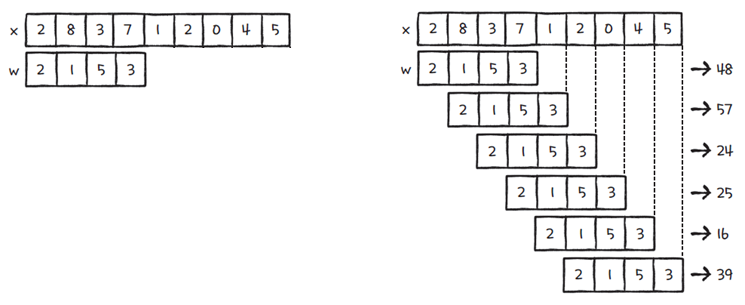








### 손으로 계산 연습
- 위 필터 W로 X를 1D Convolution한 연산 결과를 구하시오.
- Zero-padding을 3만큼 한 후 1D Convolution을 진행한 결과를 구하시오. 
- 1번과 2번의 결과값의 길이가 같은가? 같지 않다면 그 이유는 무엇인가? 

### Python 코딩
위의 1, 2번 과정을 Python으로 구현하여 계산한 후 그 결과값을 비교하시오. 



In [9]:
import numpy as np
X = [2, 8, 3, 7, 1, 3, 0, 2, 5]
W = [2, 8, 3, 7]
sum=[]
for i in range(len(X)-len(W)+1):
  sum.append(np.matmul(X[i:i+4],W))
print(sum)

[126, 68, 86, 31, 40, 47]


In [10]:
X = [0, 0, 0, 2, 8, 3, 7, 1, 3, 0, 2, 5, 0, 0, 0]
sum=[]
for i in range(len(X)-len(W)+1):
  sum.append(np.matmul(X[i:i+4],W))
print(sum)

[14, 62, 61, 126, 68, 86, 31, 40, 47, 31, 44, 10]


## 2차원 컨볼루션

아래 Python 코드에는 2D convolution이 구현되어 있다. 해당 함수를 분석한 뒤 아래 기능을 추가로 구현하시오. 

- 1) numpy vector화 연산함수 사용 (연산 시간 단축)
- 2) zero-padding
- 3) Edge detection
- 4) Image Sharpening
- 5) blurring





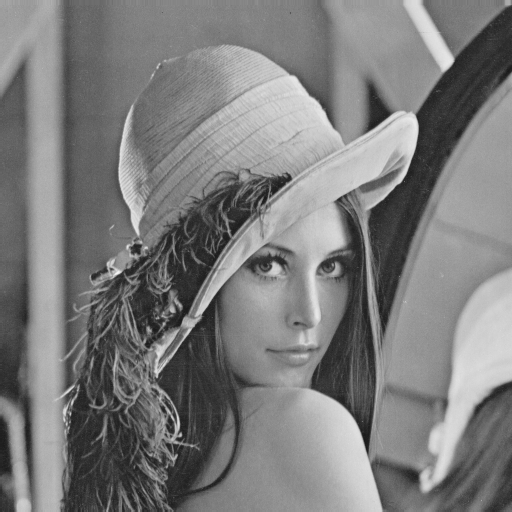

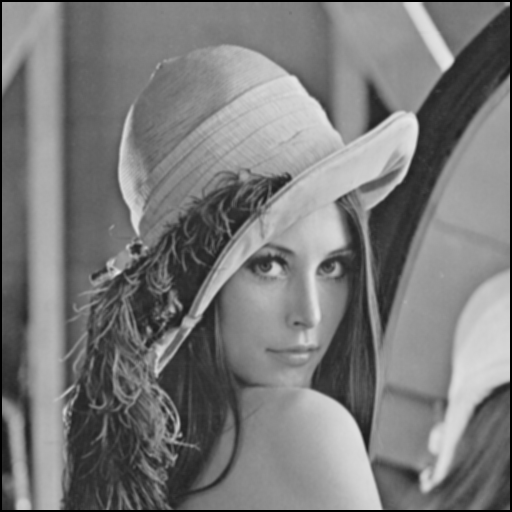

In [34]:
import numpy as np, cv2, time
from google.colab.patches import cv2_imshow
from skimage import io

  
def Conv2D(image, filter, padding=3):
    '''
    2D convolution 함수

    :param image: 입력 이미지
    :param filter: 컨볼루션 필터
    :param padding: 제로 패딩
    :return:
    '''
    param_padding=np.pad(image, (padding,padding), 'constant', constant_values=0)
    edge_filter=[[-1,0,1],[-1,0,1],[-1,0,1]]
    #blur_filter=np.array([[1,2,1,],[2,4,2],[1,2,1]])/16
    blur_filter=np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])/16
    rows, cols = image.shape[:2]
    dst = np.zeros((rows, cols), np.float32)                  # 결과 저장 행렬
    xcenter, ycenter = blur_filter.shape[1]//2, blur_filter.shape[0]//2     # 마스크 중심 좌표
    '''
    for i in range(ycenter, rows - ycenter):                # 입력 행렬 반복 순회
        for j in range(xcenter, cols - xcenter):
            sum = 0.0
            for u in range(filter.shape[0]):                    # 마스크 원소 순회
                for v in range(filter.shape[1]):
                    y, x = i + u - ycenter , j + v - xcenter
                    sum += image[y, x] * filter[u, v]           # convolution
            dst[i, j] = sum
    '''
    for i in range(ycenter, rows-ycenter):
      for j in range(xcenter, cols-xcenter):
        dst[i,j]=(image[i-1:i+filter.shape[0]-1, j-1:j+filter.shape[1]-1]*filter).sum()
    #dst=image+dst#sharpening
    return dst


image = io.imread('https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_gray.gif') 

# 블러링 마스크 원소 지정
filter = [1/9, 1/9, 1/9,
        1/9, 1/9, 1/9,
        1/9, 1/9, 1/9]

filter = np.array(filter, np.float32).reshape(3, 3)
conv2d_result = Conv2D(image, filter)   # convolution

cv2_imshow(image)
cv2_imshow(cv2.convertScaleAbs(conv2d_result))
